In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../seismiqb/src/')

In [3]:
from synthetic import generate_synthetic, SyntheticGenerator

## Two ways of generating a synthetic seismic: `SyntheticGenerator`-pipeline and `generate_synthetic`-function

* using `SyntheticGenerator`-class and chain of actions

In [4]:
gen = SyntheticGenerator(seed=100)

In [6]:
gen = (gen.make_velocities(num_reflections=100,
                           horizon_heights=(0.2, 0.3, 0.5, 0.8),
                           horizon_multipliers=(-5, 5, 6, 8))
          .make_velocity_model((200, 800), (10, ))
          .add_faults(faults=(((100, 100), (100, 220)),
                              ((150, 600), (150, 720))),
                      peak_value=0.15, zeros_share=0.4)
          .make_density_model()
          .make_synthetic()
          .postprocess_synthetic(noise_mul=0.2))

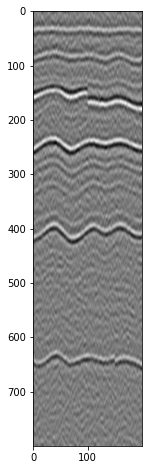

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(gen.synthetic.T, cmap=plt.cm.gray)

* using `generate_synthetic`-wrapper

In [9]:
synt2d, _ = generate_synthetic(shape=(200, 800), grid_shape=10, num_reflections=100,
                               horizon_heights=(0.2, 0.3, 0.5, 0.8),
                               horizon_multipliers=(-5, 5, 6, 8),
                               faults=(((100, 100), (100, 220)),
                                        ((150, 600), (150, 720))),
                               peak_value=0.15, zeros_share_faults=0.4, seed=100, noise_mul=0.2)

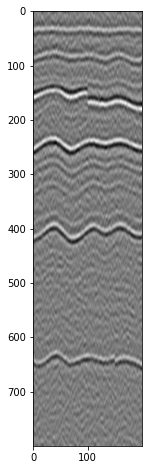

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(synt2d.T, cmap=plt.cm.gray)

## Creating a synthetic seismic cube and loading it with `seismiqb`

In [4]:
sys.path.append('../')

In [30]:
from seismiqb.src.geometry.export import make_segy_from_array
from seismiqb import SeismicGeometry, Horizon

In [22]:
synt3d, hors = generate_synthetic(shape=(150, 150, 200), grid_shape=(10, 10),
                                  num_reflections=60, faults=None)

In [23]:
make_segy_from_array(synt3d, 'cube_test.sgy', zip_segy=False)

  0%|          | 0/150 [00:00<?, ?it/s]

In [24]:
geom = SeismicGeometry('./cube_test.sgy')

In [31]:
horizon = Horizon(hors[0], geom)

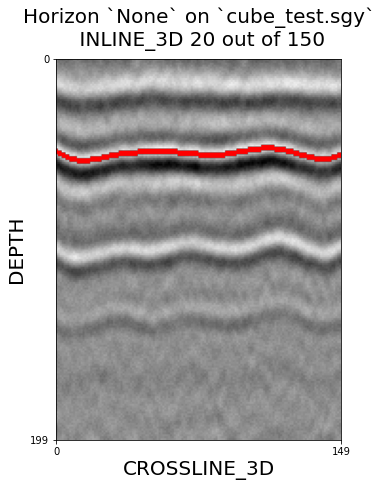

In [34]:
horizon.show_slide(20)